In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt

with open('stopwords_ua.txt', 'r', encoding='utf-8') as f:
    stop_words_list = [line.strip().lower() for line in f]

df = pd.read_csv('pravda_data_cleaned.csv')

text = ' '.join(df['Text'])

words = re.findall(r'\b\w+\b', text, flags=re.UNICODE)

words = [word.lower() for word in words]

filtered_words = [word for word in words if word not in stop_words_list]

df_word_freq = pd.DataFrame(filtered_words, columns=['Слово'])

word_freq = df_word_freq['Слово'].value_counts().reset_index()
word_freq.columns = ['Слово', 'Кількість']

df_word_freq_sorted = word_freq.sort_values(by='Кількість', ascending=False).reset_index(drop=True)

df_word_freq_sorted.to_csv('pravda_data_word_freq.csv')


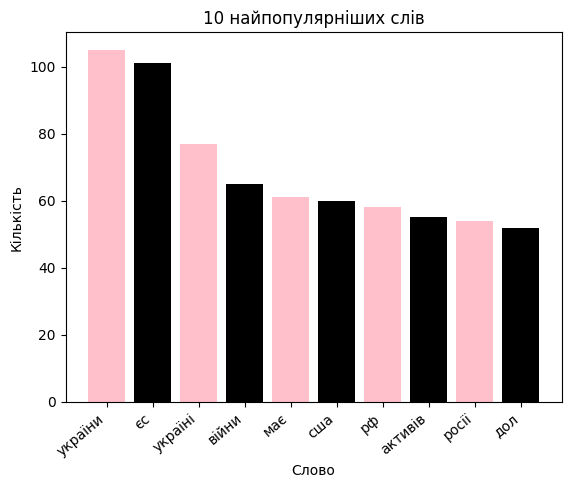

In [7]:
colors =["pink", "black"]
top_10_words = df_word_freq_sorted.head(10)
plt.bar(top_10_words['Слово'], top_10_words['Кількість'], color=colors)
plt.xlabel('Слово')
plt.ylabel('Кількість')
plt.title('10 найпопулярніших слів')
plt.xticks(rotation=40, ha='right')
plt.show()
